In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import folium
from folium import plugins
from folium.plugins import HeatMap

In [3]:
df = pd.read_csv('accidents_2017.csv')

In [14]:
df.head(10)

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,0,Unknown,Número 27 ...,0,0,13,8,0,2,0,2,2,2.125624,41.340045
1,2017S007316,0,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,0,1,1,13,0,2,0,2,2,2.120452,41.339426
2,2017S010210,0,Unknown,Litoral (Besòs) ...,0,2,8,21,1,5,0,5,2,2.167356,41.360885
3,2017S006364,0,Unknown,Número 3 Zona Franca ...,0,3,21,2,2,1,0,1,2,2.124529,41.337668
4,2017S004615,1,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,1,4,25,14,1,1,0,1,3,2.185272,41.416365
5,2017S007775,1,el Camp de l'Arpa del Clot,Indústria / Trinxant ...,2,1,20,12,0,1,0,1,2,2.183245,41.416336
6,2017S004484,1,el Camp de l'Arpa del Clot,Trinxant / Indústria ...,3,4,20,21,1,1,0,1,2,2.183245,41.416336
7,2017S010680,1,el Camp de l'Arpa del Clot,Indústria ...,4,2,26,20,1,2,0,2,1,2.183561,41.416372
8,2017S005152,1,el Camp de l'Arpa del Clot,Indústria ...,5,5,12,15,1,1,0,1,1,2.184059,41.416763
9,2017S003932,1,el Camp de l'Arpa del Clot,Maragall ...,2,4,3,20,1,1,0,1,1,2.181225,41.413958


In [16]:
df["Mild injuries"].value_counts()

1     7253
2     1579
0     1082
3      273
4       99
5       31
6       11
7        7
10       2
9        1
8        1
Name: Mild injuries, dtype: int64

In [17]:
df.describe()

,District Name,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
count,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000
mean,4.526743,2.720379,5.438534,15.775994,13.811394,0.721733,1.154174,0.023310,1.178644,1.920979,2.162832,41.399346
std,2.636620,1.946882,3.372411,8.763455,5.316490,0.656561,0.742294,0.163803,0.735145,0.714011,0.024176,0.021251
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.091855,41.323094
25%,3.000000,1.000000,3.000000,8.000000,10.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.144985,41.386288
50%,4.000000,3.000000,5.000000,16.000000,14.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.163399,41.396730
75%,6.000000,4.000000,8.000000,23.000000,18.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.180179,41.411038
max,10.000000,6.000000,11.000000,31.000000,23.000000,2.000000,10.000000,4.000000,10.000000,14.000000,2.222572,41.468244


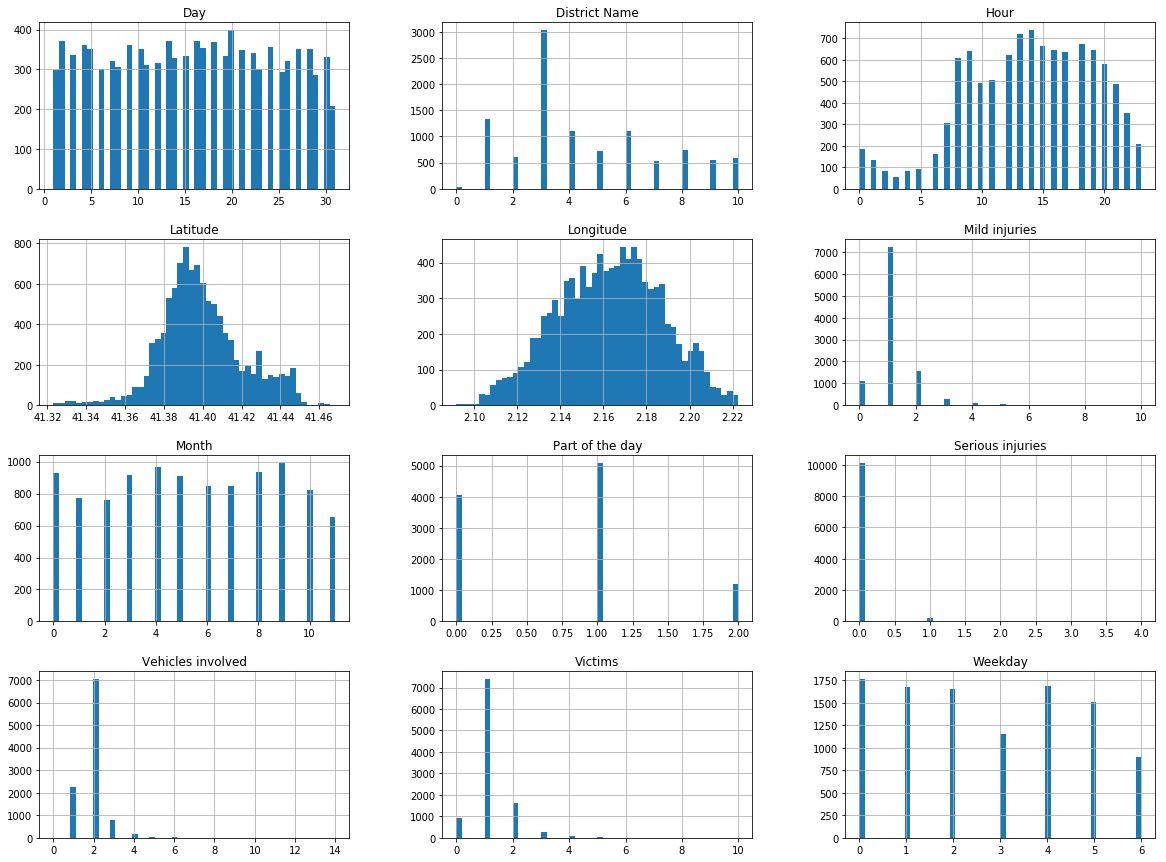

In [18]:
%matplotlib inline
df.hist(bins=50, figsize = (20,15))
plt.show()

In [19]:
np.random.seed(42)

In [21]:
import numpy as np
import numpy.random as rnd


def split_train_test(data, test_ratio):
    shuffled_indices = rnd.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [23]:
train_set, test_set = split_train_test(df, 0.2)

In [25]:
print(len(train_set), "train +" , len(test_set), "test" )

8272 train + 2067 test


In [26]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [29]:
df_with_id = df.reset_index()
train_set, test_set = split_train_test_by_id(df_with_id, 0.2, "index")

In [31]:
df_with_id["id"] = df["Longitude"] * 1000 + df["Latitude"]
train_set, test_set = split_train_test_by_id(df_with_id, 0.2, "id")

In [32]:
test_set.head()

,index,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,id
20,20,2017S007606,1,el Camp de l'Arpa del Clot,València ...,1,1,14,14,1,1,0,1,2,2.154877,41.386210,2196.263210
64,64,2017S003914,1,el Besòs i el Maresme,Litoral (Llobregat) ...,2,4,3,11,0,4,0,4,2,2.221726,41.410514,2263.136514
68,68,2017S010707,1,Sant Martí de Provençals,Guipúscoa / Agricultura ...,2,2,27,16,1,2,0,2,2,2.200363,41.418811,2241.781811
73,73,2017S005072,1,la Verneda i la Pau,Santander ...,0,5,9,17,1,1,0,1,2,2.200553,41.426416,2241.979416
75,75,2017S000944,1,Sant Martí de Provençals,CANTÀBRIA ...,0,10,3,20,1,1,0,1,1,2.204322,41.417325,2245.739325


In [33]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [34]:
test_set.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
7732,2017S008535,10,el Bon Pastor,Litoral (Besòs) ...,4,0,17,12,0,1,0,1,2,2.207175,41.442209
2464,2017S009202,10,Sant Andreu,Malats / Orfila ...,4,9,7,14,1,1,0,1,1,2.190798,41.436160
9515,2017S008026,3,la Dreta de l'Eixample,Mossèn Jacint Verdaguer ...,0,1,29,8,0,1,0,1,2,2.169930,41.399058
3379,2017S007299,5,la Maternitat i Sant Ramon,Sabino Arana / Carles III ...,1,11,31,15,1,1,0,1,2,2.127194,41.385724
5615,2017S001485,3,la Dreta de l'Eixample,PL TETUAN ...,2,10,22,20,1,2,0,2,1,2.175182,41.395581


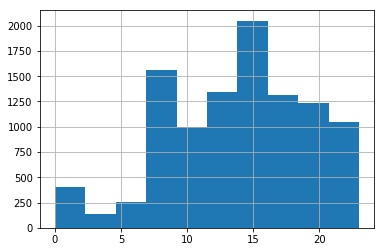

In [38]:
df['Hour'].hist()

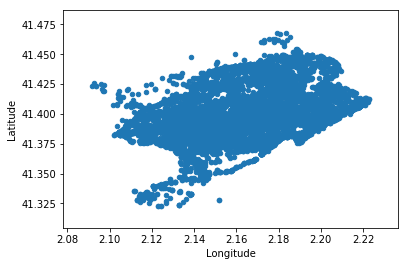

In [44]:
df.plot(kind="scatter", x="Longitude", y="Latitude")

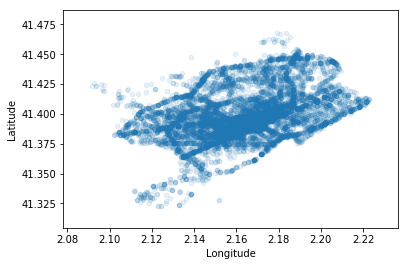

In [45]:
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1)

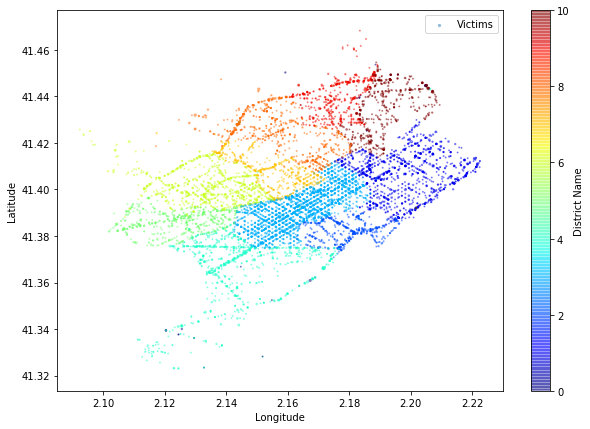

In [52]:
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
    s=df["Victims"], label="Victims", figsize=(10,7),
    c="District Name", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()


/Users/Irina/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'All Crime Distribution per District')

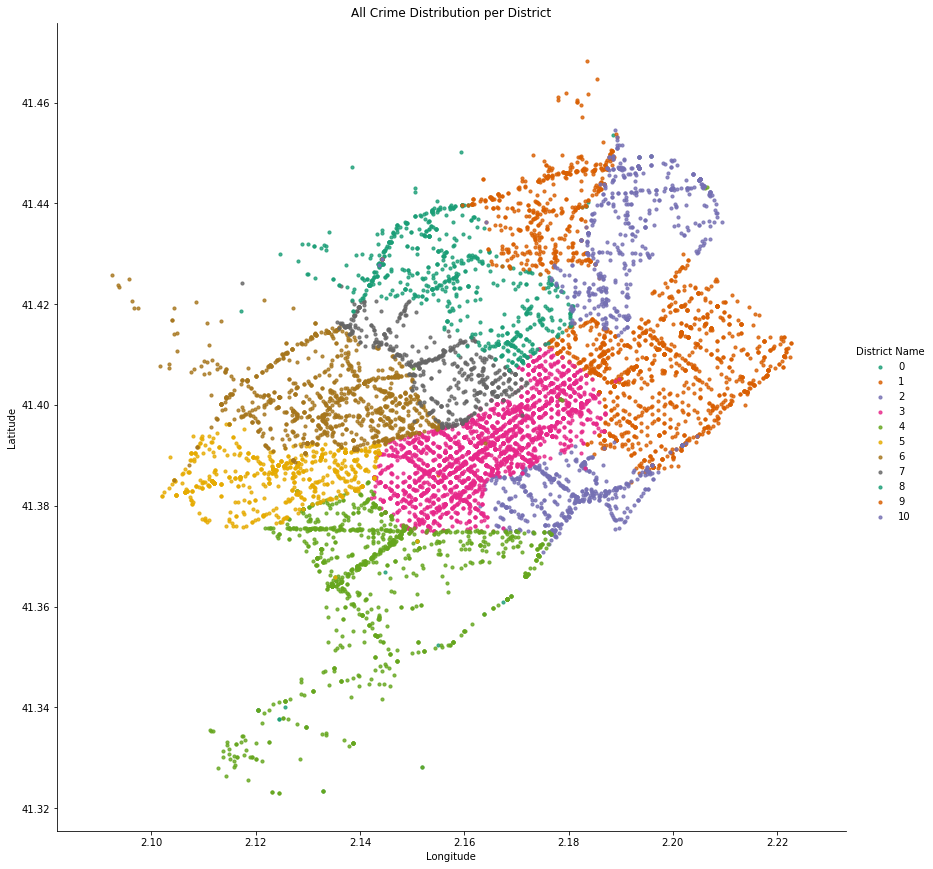

In [82]:
import seaborn as sns
df_victims = df.loc[(df['Victims']!=0)]

sns.lmplot('Longitude', 
           'Latitude',
           data=df_victims[:],
           fit_reg=False, 
           hue="District Name",
           palette='Dark2',
           size=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("All Crime Distribution per District")

/Users/Irina/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


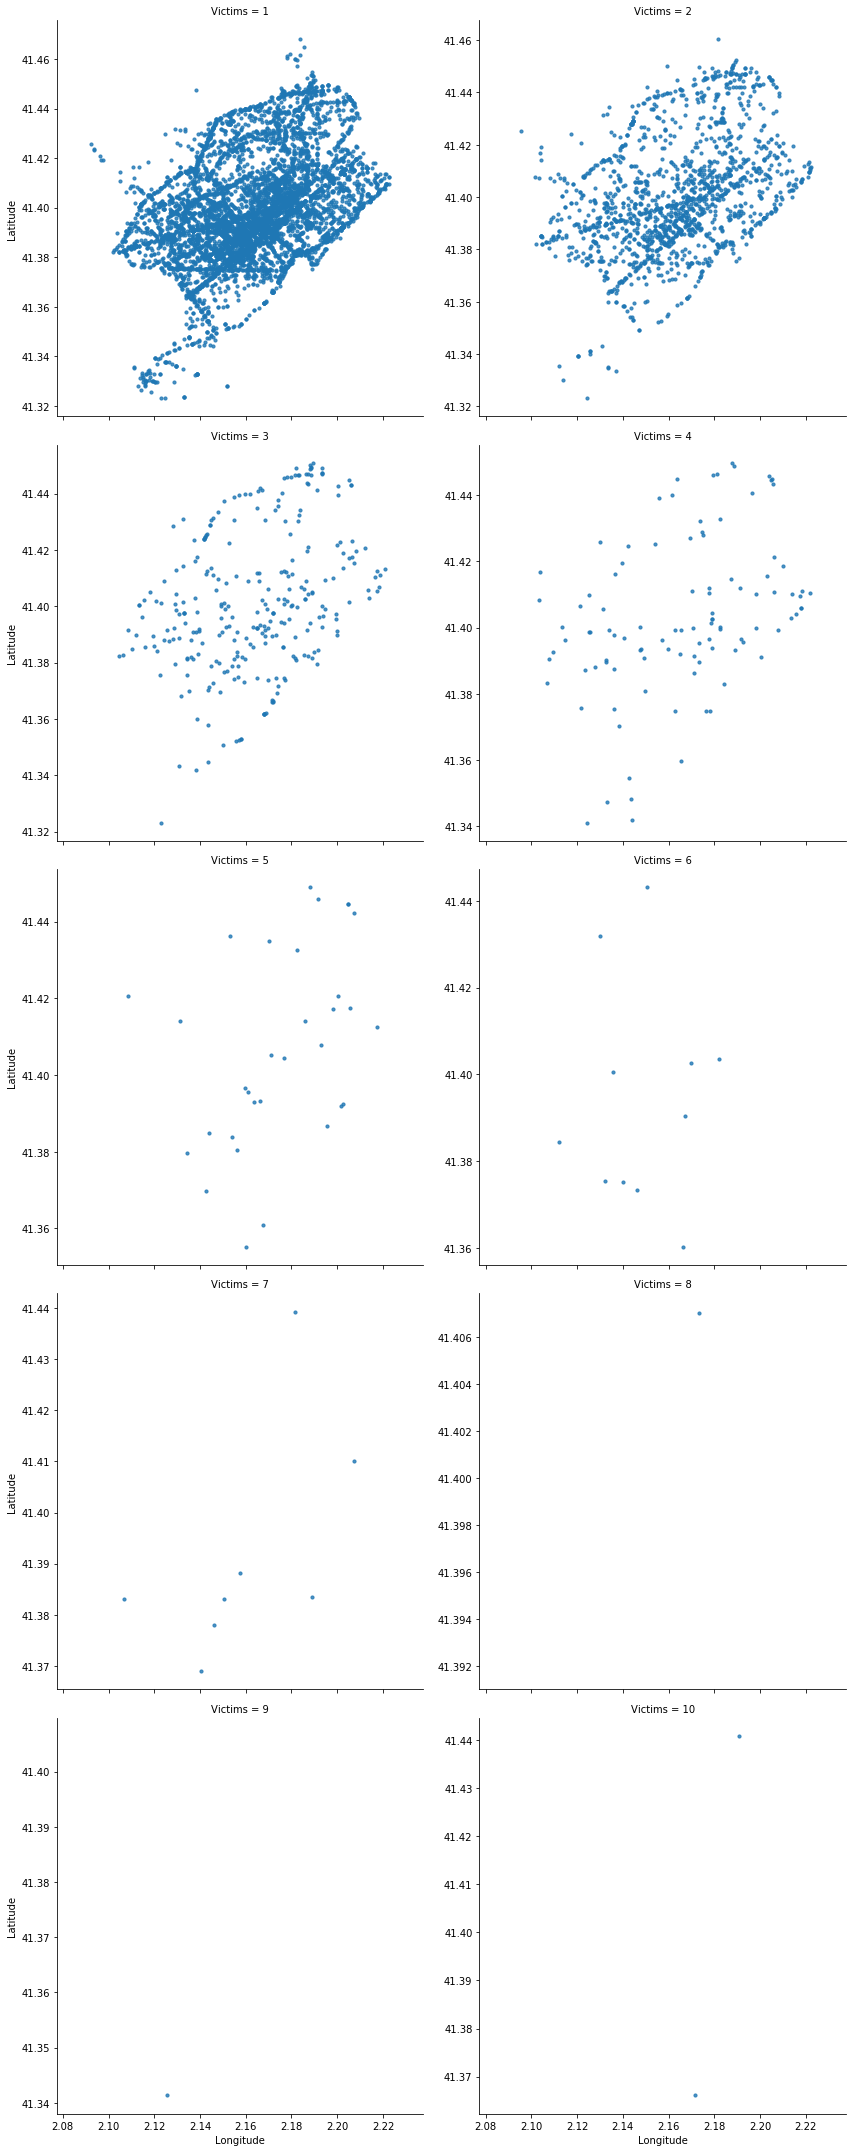

In [87]:
g = sns.lmplot(x="Longitude",
               y="Latitude",
               col="Victims",
               data=df_victims.dropna(), 
               col_wrap=2, size=6, fit_reg=False, 
               sharey=False,
               scatter_kws={"marker": "D",
                            "s": 10})

In [102]:
barcelona_coordinates = [41.406141, 2.168594]
accidents_df = df_a.head(100)
df_victims = df.loc[(df['Victims']!=0)]
from folium.plugins import HeatMap

map_accidents = folium.Map(location=barcelona_coordinates, tiles='cartodbpositron', zoom_start=13)

lat_long_df = df_victims[['Latitude','Longitude']].as_matrix()


map_accidents.add_child(plugins.HeatMap(lat_long_df))

map_accidents



/Users/Irina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
